The files in this directory include:

regInterFullFiltered.html - A listing of all the interactions in the data in an HTML table.
 
coliInterFullVec.txt - All interactions in the dataset listed as a three column vector (operon number, transcription factor number, regulation type (1 activator, 2 repressor, 3 dual)).

coliInterNoAutoRegVec.txt - A binary (unsigned) version of coliInterFullVec only without autoregulation interactions.

coliInterFullNames.txt - A two column vector, the first column is a number, matching the number of the first two columns of the above interaction files, and the second column is the name of the operon.

RegulonDB data is of version 3.2 XML version with the unknown interactions, and the chip only interactions (00001) NOT included.
All other data collected by Shai Shen-Orr under the supervision of Dr. Uri Alon

There are 578 interactions in the matrix (519 with no autoregulation).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import scipy
import sklearn
%matplotlib inline

In [2]:
#import table with names of genes
names = pd.read_table('colinet/coliInterFullNames.txt', sep=' ', header=None)
names.columns = ['id', 'gene']

#import table containing all interactions
full_vec = pd.read_table('colinet/coliInterFullVec.txt', sep=' ', header=None)
full_vec.columns = ['operon_number', 'transcription_number', 'regulation_type']
full_vec['regulation_type'] = full_vec['regulation_type'].replace([1, 2, 3], ['activator', 'repressor', 'dual'])

#import names of operons and transcrption factors
operons = pd.read_csv('colinet/operon_names.csv')
operons.columns = ['transcripion_name', 'operon_name']
names = names.join(operons)

#merge the two tables on the indexes
df = names.merge(full_vec, left_index=True, right_index=True)

print(df.shape)
df.head()

(423, 7)


,id,gene,transcripion_name,operon_name,operon_number,transcription_number,regulation_type
0,1,aceBAK,AcrR,acrAB,3,4,repressor
1,2,acnA,Ada,ada-alkB,6,6,dual
2,3,acrAB,Ada,aidB,11,6,activator
3,4,acrR,Ada,alkA,14,6,activator
4,5,acs,AdiY,adiA,8,9,activator


In [3]:
#print the number of unique variables in each feature
for col in df:
    print('Unique '+ col + ' variables:', df[col].nunique())

Unique id variables: 423
Unique gene variables: 423
Unique transcripion_name variables: 88
Unique operon_name variables: 280
Unique operon_number variables: 272
Unique transcription_number variables: 87
Unique regulation_type variables: 3


In [4]:
#create a list of tuples between the operon and transcription numbers
tuples = [(x[4], x[5]) for x in df.values]

#create a blank network graph
G = nx.Graph()

#fill the network graph with the tuple list as edges
G.add_edges_from(tuples)

In [5]:
#add attributes to the nodes in the graph
for node in df['id']:
    if node in G.nodes():
        G.node[node]['Gene'] = df.loc[df['id']==node,'gene'].values[0]
        G.node[node]['Regulation Type'] = df.loc[df['id']==node,'regulation_type'].values[0]
        G.node[node]['Transcription Factor Name'] = df.loc[df['id']==node,'transcripion_name'].values[0]
        G.node[node]['Operon Name'] = df.loc[df['id']==node,'operon_name'].values[0]
        
print('Node 10: ', G.nodes[10])

Node 10:  {'Gene': 'ahpCF', 'Regulation Type': 'dual', 'Transcription Factor Name': 'AraC', 'Operon Name': 'araE'}


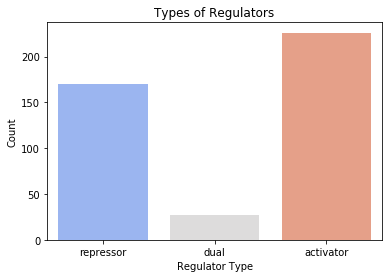

In [6]:
sns.countplot('regulation_type', data=df, palette='coolwarm')
plt.xlabel('Regulator Type')
plt.ylabel('Count')
plt.title('Types of Regulators')

plt.show()

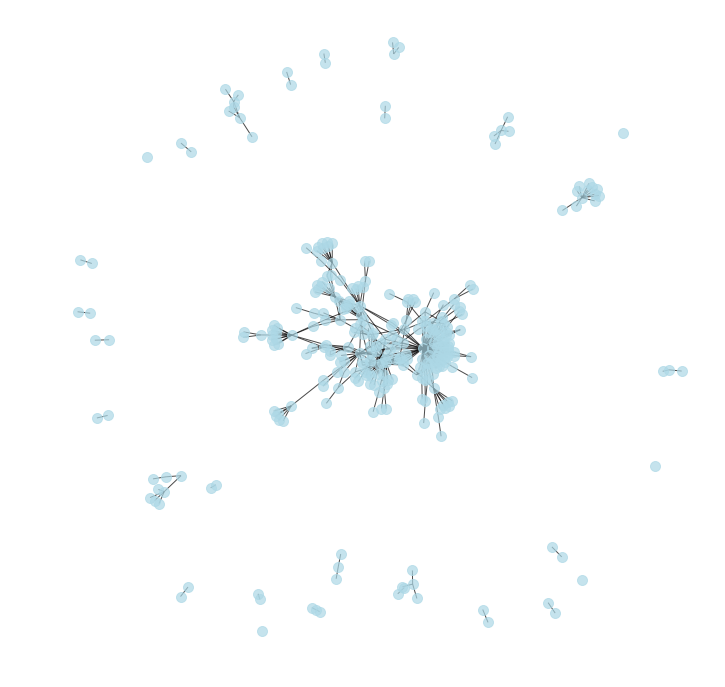

In [7]:
#draw the created graph
plt.figure(figsize=(12, 12))
nx.draw_networkx(G,
                 pos=nx.spring_layout(G), 
                 node_color='lightblue',
                 edge_color='black',
                 node_size=100,
                 with_labels=False,
                 alpha=.7
                 )
plt.axis('off')
plt.show()

In [8]:
number_of_nodes = G.number_of_nodes()
number_of_edges = G.number_of_edges()
node_dict = dict(G.degree())
node_degrees = list(node_dict.values())
avg_degree = np.mean(node_degrees)
med_degree = np.median(node_degrees)
max_degree = max(node_degrees)
clustering = list(nx.clustering(G).values())
betweenness_cent = list(nx.betweenness_centrality(G).values())
component_sizes = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

print("This graph has {} nodes and {} edges.".format(number_of_nodes, number_of_edges))
print("The median degree is {} and the mean degree is {}.".format(med_degree, avg_degree))
print("A disease node with median degree is connected to {}% of other diseases.".format((med_degree/number_of_nodes)*100))
print("The disease node with the maximum degree is connected to {}% of other diseases.".format((max_degree/number_of_nodes)*100))
print("There are {} connected components within the graph.".format(nx.number_connected_components(G)))

This graph has 309 nodes and 423 edges.
The median degree is 1.0 and the mean degree is 2.737864077669903.
A disease node with median degree is connected to 0.3236245954692557% of other diseases.
The disease node with the maximum degree is connected to 23.948220064724918% of other diseases.
There are 31 connected components within the graph.


In [9]:
degree_list = []
for degree in G.degree():
    if degree[1] > 1:
        degree_list.append(degree)
sorted(degree_list, key=lambda x: x[1], reverse=True)

[(66, 74),
 (143, 24),
 (190, 23),
 (24, 21),
 (137, 16),
 (227, 16),
 (282, 14),
 (222, 13),
 (274, 13),
 (64, 12),
 (154, 12),
 (136, 10),
 (193, 10),
 (30, 8),
 (20, 7),
 (237, 7),
 (77, 7),
 (82, 7),
 (148, 7),
 (292, 7),
 (241, 7),
 (56, 6),
 (270, 6),
 (251, 6),
 (252, 6),
 (298, 6),
 (304, 6),
 (144, 5),
 (157, 5),
 (169, 5),
 (290, 5),
 (114, 5),
 (119, 5),
 (267, 5),
 (6, 4),
 (1, 4),
 (49, 4),
 (172, 4),
 (285, 4),
 (357, 4),
 (5, 4),
 (151, 4),
 (233, 4),
 (246, 4),
 (369, 4),
 (68, 4),
 (291, 4),
 (123, 4),
 (197, 4),
 (175, 4),
 (229, 4),
 (258, 4),
 (18, 3),
 (165, 3),
 (202, 3),
 (351, 3),
 (43, 3),
 (57, 3),
 (86, 3),
 (87, 3),
 (118, 3),
 (240, 3),
 (287, 3),
 (318, 3),
 (345, 3),
 (382, 3),
 (74, 3),
 (88, 3),
 (94, 3),
 (203, 3),
 (127, 3),
 (200, 3),
 (272, 3),
 (273, 3),
 (7, 3),
 (160, 3),
 (162, 3),
 (181, 3),
 (188, 3),
 (92, 3),
 (278, 3),
 (294, 3),
 (207, 3),
 (14, 2),
 (17, 2),
 (19, 2),
 (21, 2),
 (22, 2),
 (23, 2),
 (73, 2),
 (76, 2),
 (85, 2),
 (117, 2),


In [10]:
for degree in G.degree():
    if degree[1] >= 10:
        print('Node '+ str(degree[0])+' with a degree of ' + str(degree[1]) + ':')
        print('\t', G.node[degree[0]])

Node 24 with a degree of 21:
	 {'Gene': 'arcA', 'Regulation Type': 'repressor', 'Transcription Factor Name': 'ArcA', 'Operon Name': 'glcDEFGB'}
Node 64 with a degree of 12:
	 {'Gene': 'cpxAR', 'Regulation Type': 'activator', 'Transcription Factor Name': 'CRP', 'Operon Name': 'acs'}
Node 66 with a degree of 74:
	 {'Gene': 'crp', 'Regulation Type': 'activator', 'Transcription Factor Name': 'CRP', 'Operon Name': 'ansB'}
Node 136 with a degree of 10:
	 {'Gene': 'flhDC', 'Regulation Type': 'activator', 'Transcription Factor Name': 'CRP', 'Operon Name': 'yiaKLMNOPQRS'}
Node 154 with a degree of 12:
	 {'Gene': 'fur', 'Regulation Type': 'dual', 'Transcription Factor Name': 'CytR', 'Operon Name': 'tsx'}
Node 193 with a degree of 10:
	 {'Gene': 'hns', 'Regulation Type': 'activator', 'Transcription Factor Name': 'FIS', 'Operon Name': 'leuX'}
Node 137 with a degree of 16:
	 {'Gene': 'fliAZY', 'Regulation Type': 'activator', 'Transcription Factor Name': 'CsgD', 'Operon Name': 'csgBA'}
Node 143 with

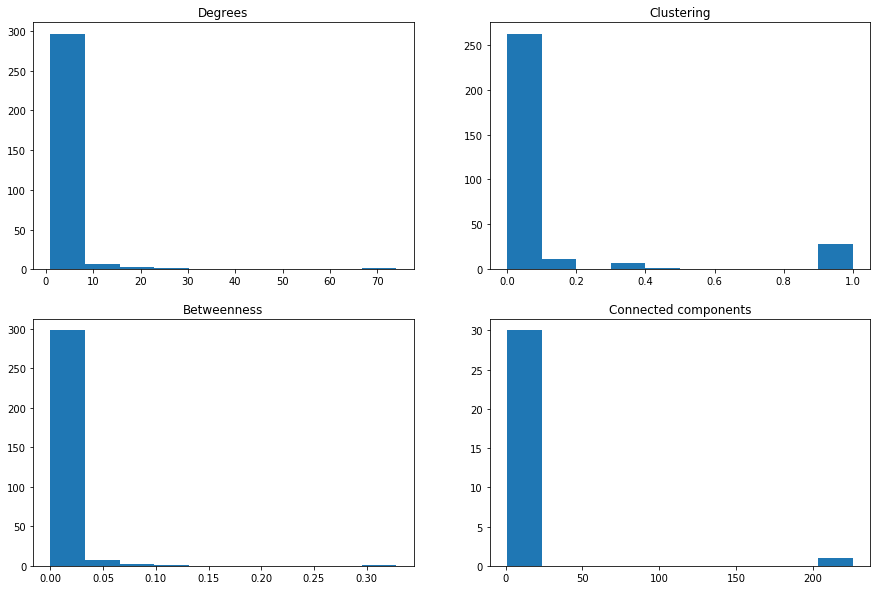

In [11]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.hist(node_degrees)
plt.title('Degrees')

plt.subplot(222)
plt.hist(clustering)
plt.title('Clustering')

plt.subplot(223)
plt.hist(betweenness_cent)
plt.title('Betweenness')

plt.subplot(224)
plt.hist(component_sizes)
plt.title('Connected components')
plt.show()

In [12]:
# Pulling our node-level statistics together into a dataframe.
graph_stats=pd.DataFrame({'node':list(dict(G.degree()).keys()),
                          'degree':list(dict(G.degree()).values()),
                          'clustering':list(nx.clustering(G).values()),
                          'betweenness_cent':list(nx.betweenness_centrality(G).values()),
                          'degree_cent':list(nx.degree_centrality(G).values())
                         })

# Assigning each node to a component by number.
graph_stats['component']=None
graph_stats['regulation_type'] = df['regulation_type']

# Sorting the components by size so that the largest component will be numbered 0.
components=sorted(nx.connected_components(G), key=len, reverse=True)
for i,component in enumerate(components):
    graph_stats.loc[graph_stats['node'].isin(list(component)),'component']=i
    
graph_stats.head()

,betweenness_cent,clustering,degree,degree_cent,node,component,regulation_type
0,0.000000,0.0,1,0.003247,3,9,repressor
1,0.000000,0.0,1,0.003247,4,9,dual
2,0.004738,0.0,4,0.012987,6,0,activator
3,0.000000,0.0,1,0.003247,11,0,activator
4,0.009434,0.0,2,0.006494,14,0,activator


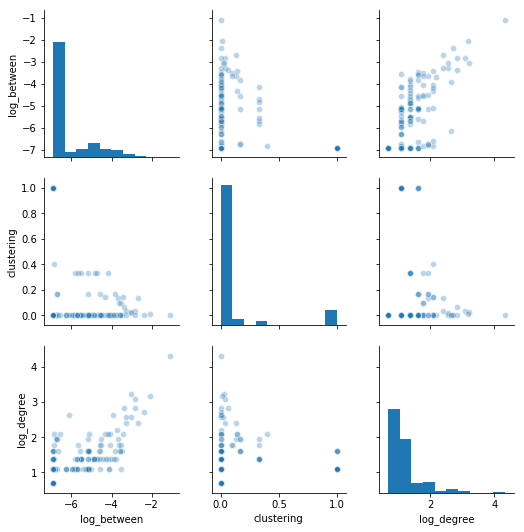

In [13]:
# Logging these two for easier relationship viewing.
graph_stats['log_between']=np.log(graph_stats['betweenness_cent']+.001)
graph_stats['log_degree']=np.log(graph_stats['degree']+1)

g = sns.pairplot(graph_stats,
                 vars=['log_between','clustering','log_degree'],
                 kind='scatter',
                plot_kws={'alpha':.3})
plt.show()

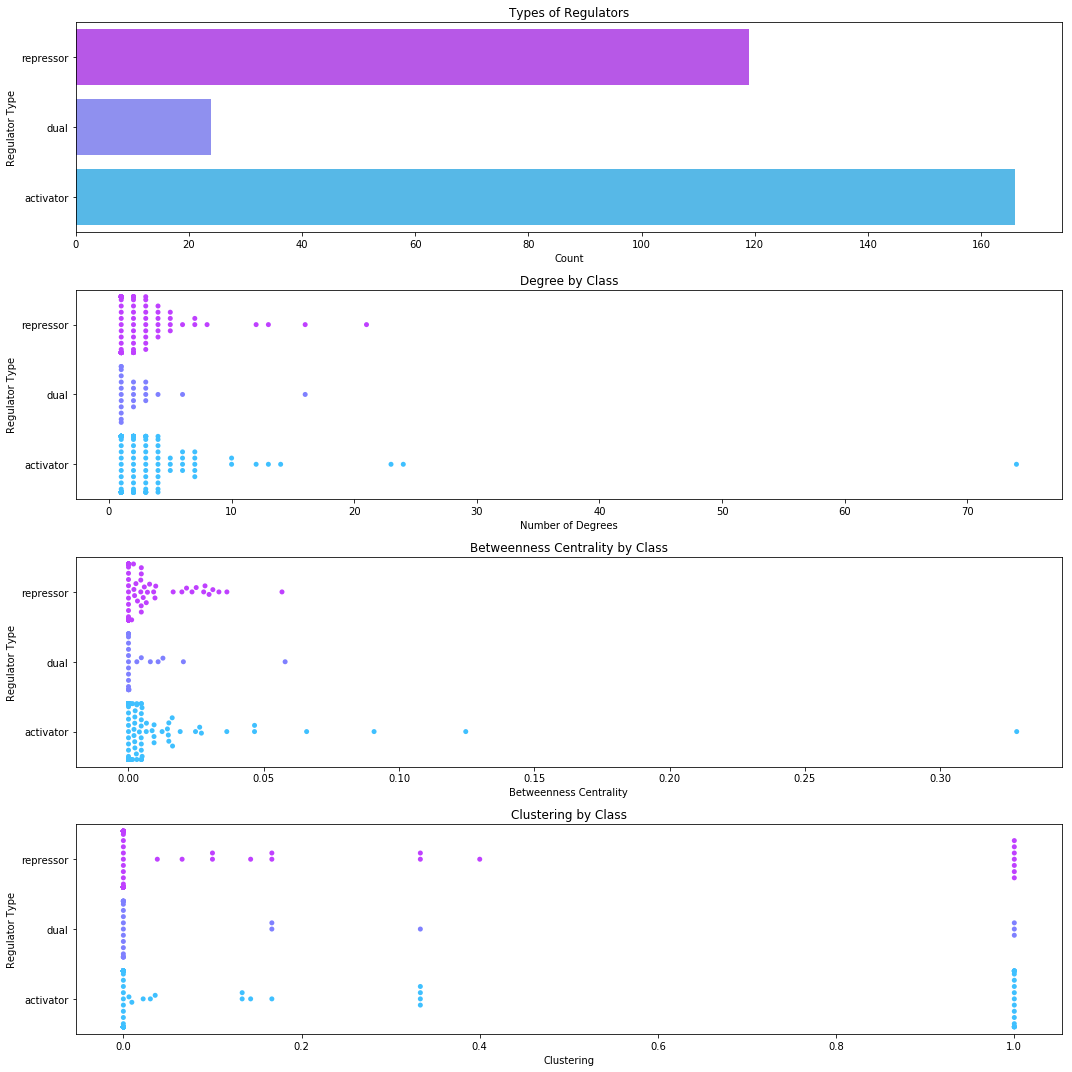

In [14]:
plt.figure(figsize=(15, 15))

plt.subplot(411)
sns.countplot(y='regulation_type', data=graph_stats, orient='h', palette='cool_r')
plt.ylabel('Regulator Type')
plt.xlabel('Count')
plt.title('Types of Regulators')

plt.subplot(412)
sns.swarmplot(x='degree', y='regulation_type', data=graph_stats, palette='cool_r')
plt.xlabel('Number of Degrees')
plt.ylabel('Regulator Type')
plt.title('Degree by Class')

plt.subplot(413)
sns.swarmplot(x='betweenness_cent', y='regulation_type', data=graph_stats, palette='cool_r')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Regulator Type')
plt.title('Betweenness Centrality by Class')

plt.subplot(414)
sns.swarmplot(x='clustering', y='regulation_type', data=graph_stats, palette='cool_r')
plt.xlabel('Clustering')
plt.ylabel('Regulator Type')
plt.title('Clustering by Class')


plt.tight_layout()
plt.show()

In [15]:
component_df = pd.DataFrame()
component_df['number_nodes'] = graph_stats.groupby('regulation_type')['component'].count()
component_df['connections'] = graph_stats.groupby('regulation_type')['component'].apply(lambda x: len(set(x)))
component_df['connections_normed'] = component_df.connections/component_df.number_nodes
component_df['median_degree'] = graph_stats.groupby('regulation_type')['degree'].median()
component_df['avg_degree'] = graph_stats.groupby('regulation_type')['degree'].mean()
#component_df['count_clusters'] = graph_stats.groupby('regulation_type')['clustering'].count()
component_df['avg_clusters'] = graph_stats.groupby('regulation_type')['clustering'].mean()
#component_df['avg_centrality'] = graph_stats.groupby('betweenness_cent')['clustering'].mean()
component_df

,number_nodes,connections,connections_normed,median_degree,avg_degree,avg_clusters
regulation_type,,,,,,
activator,166,19,0.114458,2.0,3.072289,0.120564
dual,24,6,0.250000,1.5,2.500000,0.152778
repressor,119,20,0.168067,1.0,2.319328,0.074344


In [16]:
classlist=list(nx.get_node_attributes(G,'Regulation Type').values())
#Creating a dictionary associating each class with a unique integer.
classes=set(classlist)
dictionary=dict(zip(classes,range(len(classes))))
class_list = []
for stuff in classlist:
    if stuff == 'activator':
        class_list.append(0)
    elif stuff == 'dual':
        class_list.append(1)
    else:
        class_list.append(2)

class_dict = dict(zip(list(G.nodes), class_list))
dictionary

{'repressor': 0, 'dual': 1, 'activator': 2}

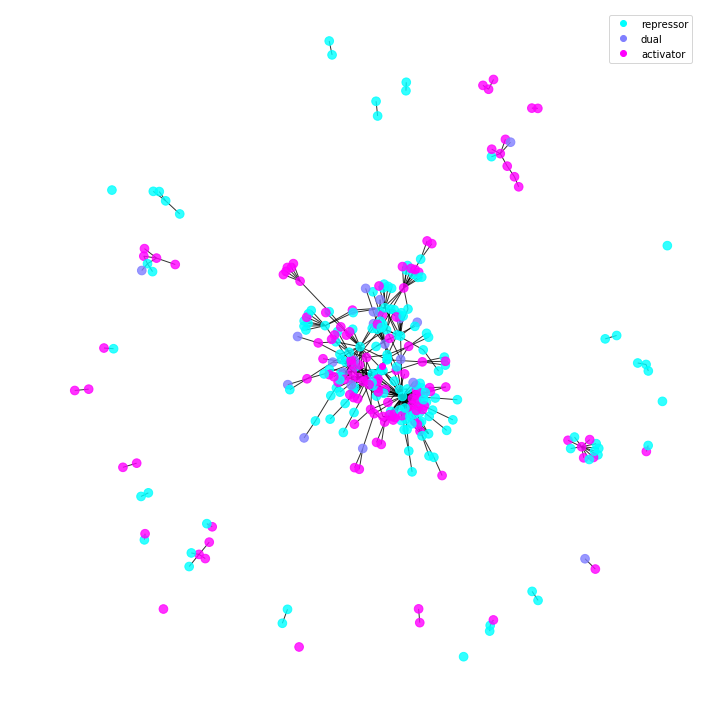

In [18]:
import matplotlib.cm as cmx
import matplotlib.colors as colors
# You were missing the position.
pos=nx.spring_layout(G)
val_map = class_dict
#I had this list for the name corresponding to the color but different from the node name
ColorLegend = dictionary
values = [val_map.get(node, 0) for node in G.nodes()]
# Color mapping
jet = cm = plt.get_cmap('cool')
cNorm  = colors.Normalize(vmin=0, vmax=max(values))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

# Using a figure to use it as a parameter when calling nx.draw_networkx
plt.figure(figsize=(10,10))
f = plt.figure(1)
ax = f.add_subplot(1,1,1)
for label in ColorLegend:
    ax.plot([0],[0],color=scalarMap.to_rgba(ColorLegend[label]),label=label, marker='o', linewidth=0)

# Just fixed the color map
nx.draw_networkx(G,pos, cmap=jet, vmin=0, vmax=max(values),node_color=values,with_labels=False,ax=ax,
                node_size=75, alpha=0.8)

# Setting it to how it was looking before.                                                                                                              
plt.axis('off')
f.set_facecolor('w')

plt.legend()

f.tight_layout()
plt.show()

In [25]:
node66 = list(nx.all_neighbors(G, 66))

for node in node66:
    print(str(node) + ':', G.node[node])

5: {'Gene': 'acs', 'Regulation Type': 'activator', 'Transcription Factor Name': 'AdiY', 'Operon Name': 'adiA'}
13: {'Gene': 'aldB', 'Regulation Type': 'repressor', 'Transcription Factor Name': 'ArcA', 'Operon Name': 'aceBAK'}
16: {'Gene': 'ansB', 'Regulation Type': 'repressor', 'Transcription Factor Name': 'ArcA', 'Operon Name': 'betIBA'}
19: {'Gene': 'araBAD', 'Regulation Type': 'repressor', 'Transcription Factor Name': 'ArcA', 'Operon Name': 'dctA'}
20: {'Gene': 'araC', 'Regulation Type': 'repressor', 'Transcription Factor Name': 'ArcA', 'Operon Name': 'fadBA'}
21: {'Gene': 'araE', 'Regulation Type': 'activator', 'Transcription Factor Name': 'ArcA', 'Operon Name': 'focA-pflB'}
22: {'Gene': 'araFG_araH_1H_2', 'Regulation Type': 'repressor', 'Transcription Factor Name': 'ArcA', 'Operon Name': 'fumA'}
23: {'Gene': 'araJ', 'Regulation Type': 'repressor', 'Transcription Factor Name': 'ArcA', 'Operon Name': 'fumC'}
56: {'Gene': 'caiF', 'Regulation Type': 'activator', 'Transcription Factor 